# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import keras

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [72]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [73]:
    cap.release()
    cv2.destroyAllWindows()

In [74]:
draw_landmarks(frame, results)

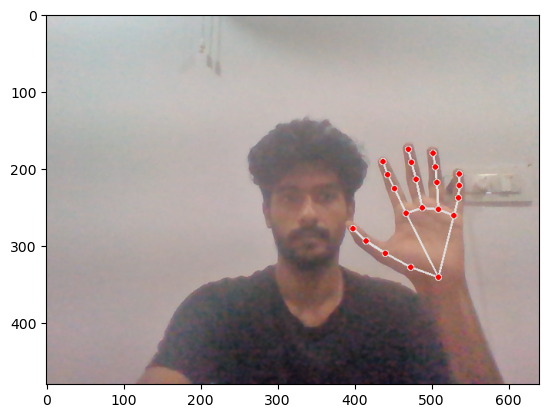

In [75]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [76]:
len(results.left_hand_landmarks.landmark)

21

In [85]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [86]:

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [87]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks:
     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else: np.zeros(1404)


In [88]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [89]:
result_test = extract_keypoints(results)

In [90]:
result_test

array([ 7.96777844e-01,  7.11410046e-01,  2.69030323e-07,  7.39520252e-01,
        6.85039103e-01, -2.05074158e-02,  6.87600017e-01,  6.47161126e-01,
       -3.10742240e-02,  6.49124622e-01,  6.13196075e-01, -4.05017100e-02,
        6.23222411e-01,  5.80392063e-01, -4.88849208e-02,  7.30100811e-01,
        5.38847029e-01, -8.79677292e-03,  7.06438005e-01,  4.71450925e-01,
       -2.10891124e-02,  6.93428397e-01,  4.33376074e-01, -3.35389450e-02,
        6.83077812e-01,  3.99213403e-01, -4.33069766e-02,  7.63246775e-01,
        5.24318397e-01, -1.08420802e-02,  7.50589788e-01,  4.46951330e-01,
       -1.86908934e-02,  7.41919160e-01,  4.01729465e-01, -2.82195024e-02,
        7.35291421e-01,  3.65171611e-01, -3.62904444e-02,  7.95923889e-01,
        5.27396202e-01, -1.69130582e-02,  7.93414712e-01,  4.56212550e-01,
       -2.62376498e-02,  7.89782226e-01,  4.12873864e-01, -3.37072425e-02,
        7.84910798e-01,  3.76309276e-01, -4.02002707e-02,  8.28048348e-01,
        5.44836402e-01, -

In [91]:
np.save('0', result_test)

In [92]:
np.load('0.npy')

array([ 7.96777844e-01,  7.11410046e-01,  2.69030323e-07,  7.39520252e-01,
        6.85039103e-01, -2.05074158e-02,  6.87600017e-01,  6.47161126e-01,
       -3.10742240e-02,  6.49124622e-01,  6.13196075e-01, -4.05017100e-02,
        6.23222411e-01,  5.80392063e-01, -4.88849208e-02,  7.30100811e-01,
        5.38847029e-01, -8.79677292e-03,  7.06438005e-01,  4.71450925e-01,
       -2.10891124e-02,  6.93428397e-01,  4.33376074e-01, -3.35389450e-02,
        6.83077812e-01,  3.99213403e-01, -4.33069766e-02,  7.63246775e-01,
        5.24318397e-01, -1.08420802e-02,  7.50589788e-01,  4.46951330e-01,
       -1.86908934e-02,  7.41919160e-01,  4.01729465e-01, -2.82195024e-02,
        7.35291421e-01,  3.65171611e-01, -3.62904444e-02,  7.95923889e-01,
        5.27396202e-01, -1.69130582e-02,  7.93414712e-01,  4.56212550e-01,
       -2.62376498e-02,  7.89782226e-01,  4.12873864e-01, -3.37072425e-02,
        7.84910798e-01,  3.76309276e-01, -4.02002707e-02,  8.28048348e-01,
        5.44836402e-01, -

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['lose','accident','pain','hot','thief','help','doctor','call'])


# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [22]:
import os

# Create the MP_Data directory if it doesn't exist
os.makedirs('MP_Data', exist_ok=True)

# Create folders for each action
for action in actions:
    action_dir = os.path.join('MP_Data', action)
    os.makedirs(action_dir, exist_ok=True)

    # Create 30 folders inside each action's folder
    for i in range(30):
        folder_dir = os.path.join(action_dir, str(i))
        os.makedirs(folder_dir, exist_ok=True)


In [23]:
"""

for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

        """

'\n\nfor action in actions: \n    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))\n    for sequence in range(1,no_sequences+1):\n        try: \n            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))\n        except:\n            pass\n\n        '

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)


In [25]:
"""
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # temp
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length-1):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
               # keypoints = extract_keypoints(results)
                #npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                #np.save(npy_path, keypoints)

                
                import os

                

                keypoints = extract_keypoints(results)
                
                npy_dir = os.path.join(DATA_PATH, action, str(start_folder + sequence), str(saved_videos))
                os.makedirs(npy_dir, exist_ok=True)  # Create the directory if it doesn't exist
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                
                 # Get the folder path
                npy_dir = os.path.join(DATA_PATH, action, str(sequence))

                # Save keypoints as numpy array
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                
                
                
                
                


                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    """

"\n# Set mediapipe model \nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:\n    \n    # temp\n    \n    # Loop through actions\n    for action in actions:\n        # Loop through sequences aka videos\n        for sequence in range(start_folder, start_folder+no_sequences):\n            # Loop through video length aka sequence length\n            for frame_num in range(sequence_length-1):\n\n                # Read feed\n                ret, frame = cap.read()\n\n                # Make detections\n                image, results = mediapipe_detection(frame, holistic)\n\n                # Draw landmarks\n                draw_styled_landmarks(image, results)\n                \n                # NEW Apply wait logic\n                if frame_num == 0: \n                    cv2.putText(image, 'STARTING COLLECTION', (120,200), \n                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)\n                    cv2.putTe

In [26]:
#to increase dataset

"""
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # temp
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length-1):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
               # keypoints = extract_keypoints(results)
                #npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                #np.save(npy_path, keypoints)

                
                import os

                

                keypoints = extract_keypoints(results)
                npy_dir = os.path.join(DATA_PATH, action, str(start_folder + sequence), str(saved_videos))
                os.makedirs(npy_dir, exist_ok=True)  # Create the directory if it doesn't exist
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                
                 # Get the folder path
                npy_dir = os.path.join(DATA_PATH, action, str(sequence))

                # Save keypoints as numpy array
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                
                
                
                
                


                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
cap.release()
cv2.destroyAllWindows()

"""

"\ncap = cv2.VideoCapture(0)\n# Set mediapipe model \nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:\n    \n    # temp\n    \n    # Loop through actions\n    for action in actions:\n        # Loop through sequences aka videos\n        for sequence in range(start_folder, start_folder+no_sequences):\n            # Loop through video length aka sequence length\n            for frame_num in range(sequence_length-1):\n\n                # Read feed\n                ret, frame = cap.read()\n\n                # Make detections\n                image, results = mediapipe_detection(frame, holistic)\n\n                # Draw landmarks\n                draw_styled_landmarks(image, results)\n                \n                # NEW Apply wait logic\n                if frame_num == 0: \n                    cv2.putText(image, 'STARTING COLLECTION', (120,200), \n                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)\n  

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [135]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [136]:
label_map = {label:num for num, label in enumerate(actions)}

In [137]:
label_map

{'lose': 0,
 'accident': 1,
 'pain': 2,
 'hot': 3,
 'thief': 4,
 'help': 5,
 'doctor': 6,
 'call': 7}

In [149]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(28):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [150]:
from tensorflow.keras.utils import to_categorical
import numpy as np

X = np.array(sequences)  # shape (240, 28, 126)
labels = np.array(labels)  # shape (240,)
y = to_categorical(labels).astype(int)  # shape (240, num_classes)

print("X shape:", X.shape)
print("y shape:", y.shape)  # should now be (240, num_classes)


X shape: (240, 28, 126)
y shape: (240, 8)


In [159]:
# Containers
X_train, y_train, X_test, y_test = [], [], [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # Get all folder indices (0–29)
    all_folders = sorted(
        [int(folder) for folder in os.listdir(action_path) if folder.isdigit()]
    )

    # Split folder indices (80% train, 20% test)
    train_folders, test_folders = train_test_split(all_folders, test_size=0.2, random_state=42)

    def load_data(folder_list):
        data = []
        for folder in folder_list:
            sequence = []
            for frame_num in range(29):  # 30 frames per sequence
                frame_path = os.path.join(action_path, str(folder), f"{frame_num}.npy")
                res = np.load(frame_path)
                sequence.append(res)
            data.append(sequence)
        return np.array(data)

    # Load sequences
    X_train_action = load_data(train_folders)
    X_test_action = load_data(test_folders)

    # Labels
    y_train_action = [label_map[action]] * len(X_train_action)
    y_test_action = [label_map[action]] * len(X_test_action)

    # Append
    X_train.extend(X_train_action)
    y_train.extend(y_train_action)
    X_test.extend(X_test_action)
    y_test.extend(y_test_action)

# Final conversion
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (192, 29, 126) (192, 8)
Test set: (48, 29, 126) (48, 8)


In [153]:
y_train.shape

(192, 8)

# 7. Build and Train LSTM Neural Network

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [106]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [160]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(29,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [161]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [162]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)


Epoch 1/80
6/6 [==============================] - 6s 358ms/step - loss: 2.0412 - categorical_accuracy: 0.1823 - val_loss: 1.9069 - val_categorical_accuracy: 0.2708
Epoch 2/80
6/6 [==============================] - 1s 126ms/step - loss: 2.1853 - categorical_accuracy: 0.2656 - val_loss: 1.8082 - val_categorical_accuracy: 0.2500
Epoch 3/80
6/6 [==============================] - 1s 126ms/step - loss: 1.7873 - categorical_accuracy: 0.2812 - val_loss: 1.6788 - val_categorical_accuracy: 0.2917
Epoch 4/80
6/6 [==============================] - 1s 108ms/step - loss: 1.6898 - categorical_accuracy: 0.2917 - val_loss: 1.7343 - val_categorical_accuracy: 0.2917
Epoch 5/80
6/6 [==============================] - 1s 122ms/step - loss: 1.6954 - categorical_accuracy: 0.2708 - val_loss: 1.4578 - val_categorical_accuracy: 0.3125
Epoch 6/80
6/6 [==============================] - 1s 130ms/step - loss: 1.4910 - categorical_accuracy: 0.3698 - val_loss: 1.4420 - val_categorical_accuracy: 0.4375
Epoch 7/80
6/6 [

Epoch 51/80
6/6 [==============================] - 1s 129ms/step - loss: 0.1937 - categorical_accuracy: 0.9375 - val_loss: 0.1147 - val_categorical_accuracy: 0.9792
Epoch 52/80
6/6 [==============================] - 1s 116ms/step - loss: 0.1840 - categorical_accuracy: 0.9427 - val_loss: 0.2310 - val_categorical_accuracy: 0.9583
Epoch 53/80
6/6 [==============================] - 1s 128ms/step - loss: 0.3108 - categorical_accuracy: 0.9323 - val_loss: 0.0878 - val_categorical_accuracy: 0.9792
Epoch 54/80
6/6 [==============================] - 1s 108ms/step - loss: 0.2302 - categorical_accuracy: 0.9219 - val_loss: 0.4636 - val_categorical_accuracy: 0.9583
Epoch 55/80
6/6 [==============================] - 1s 111ms/step - loss: 0.5803 - categorical_accuracy: 0.9062 - val_loss: 0.2118 - val_categorical_accuracy: 0.9375
Epoch 56/80
6/6 [==============================] - 1s 118ms/step - loss: 0.2857 - categorical_accuracy: 0.8854 - val_loss: 0.2328 - val_categorical_accuracy: 0.9583
Epoch 57/8

In [163]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 29, 64)            48896     
                                                                 
 lstm_13 (LSTM)              (None, 29, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
Total params: 203,624
Trainable params: 203,624
Non-tr

In [164]:

from tensorboard import program

# Specify the log directory
logdir = "Users/hp/Desktop/Main project/Logs/train"

# Create a TensorBoard instance
tb = program.TensorBoard()

# Start TensorBoard
tb.configure(argv=[None, '--logdir', logdir])
tb.main()


Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)


0

# 8. Make Predictions

In [115]:
res = model.predict(X_test)

In [116]:
np.sum(res[0])

1.0000001

In [117]:
actions[np.argmax(res[3])]

'call'

In [118]:
len(res)

72

In [119]:
actions[np.argmax(y_test[1])]

'pain'

# 9. Save Weights

In [165]:
model.save('action.h5')

In [166]:
model = keras.models.load_model('action.h5')

In [167]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [168]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [169]:
yhat = model.predict(X_test)

In [170]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [121]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[61,  0],
        [ 0, 11]],

       [[62,  1],
        [ 1,  8]],

       [[61,  0],
        [ 1, 10]],

       [[66,  0],
        [ 1,  5]],

       [[61,  2],
        [ 1,  8]],

       [[65,  0],
        [ 1,  6]],

       [[61,  0],
        [ 0, 11]],

       [[62,  2],
        [ 0,  8]]], dtype=int64)

In [171]:
accuracy_score(ytrue, yhat)

0.9791666666666666

# 11. Test in Real Time

In [172]:
from scipy import stats

In [173]:
colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [174]:
len(res)

126

In [175]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [180]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-29:]
        
        if len(sequence) == 29:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hot
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hot
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hot
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hot
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
call
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
call
<class 'mediapipe.python.solution_base.SolutionOutputs'>
call
<class 'mediapipe.python.solution_base.SolutionOutputs'>
call
<class 'mediapipe.python.solution_base.SolutionOutpu

lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutputs'>
lose
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thief
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutputs'>
doctor
<class 'mediapipe.python.solution_base.SolutionOutput

KeyboardInterrupt: 

In [181]:
cap.release()
cv2.destroyAllWindows()